# 피마인디언 당뇨병 예측

In [3]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


TypeError: ignored

In [5]:
import numpy as np
import pandas as pd 
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

### 스케일 변환이 신경망 학습에 영향을 주는가?


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 원본데이터 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:, :-1], df.values[:, -1], stratify=df.values[:, -1], random_state=2022
)

In [48]:
model = Sequential([
        Dense(12, input_dim=8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                108       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=200, batch_size=50, verbose=0)

In [50]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.7138 - accuracy: 0.6927


[0.7137724757194519, 0.6927083134651184]

- 표준화데이터

- 

In [29]:
scaled = StandardScaler().fit_transform(df.values[:, :-1])
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    scaled, df.values[:,-1], stratify=df.values[:, -1], random_state=2022
)

In [30]:
model2 = Sequential([
        Dense(12, input_dim=8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [31]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train2, y_train, validation_split=0.2,
                    epochs=200, batch_size=50, verbose=0)

In [32]:
model2.evaluate(X_test2, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7292


[0.5472936034202576, 0.7291666865348816]

- 훈련과정 시각화 

In [35]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

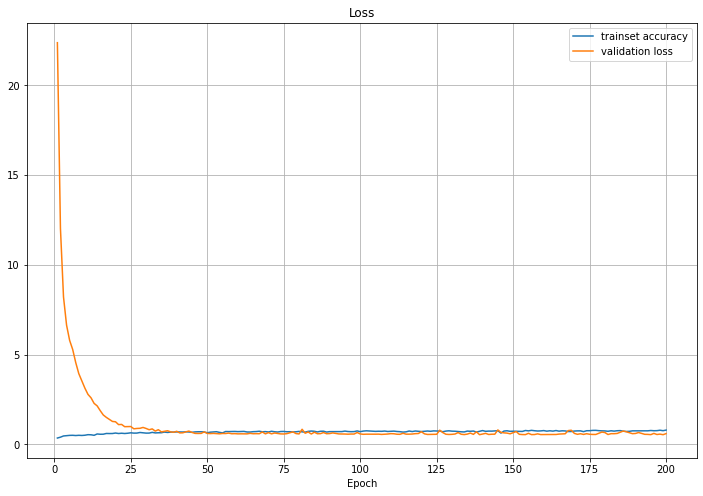

In [51]:
xs = np.arange(1,len(history.history['accuracy'])+1)     # epoch
plt.figure(figsize=(12,8))
plt.plot(xs, history.history['accuracy'], ms=5, label='trainset accuracy')
plt.plot(xs, history.history['val_loss'], ms=10, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.title('Loss')

- 트레인셋 어큐러시는 계속적으로 증가해. 
- val_loss 는 감소하다가 어느순간 꼬리를 드는 형태로 증가해. 테스트셋


Text(0.5, 1.0, 'Loss')

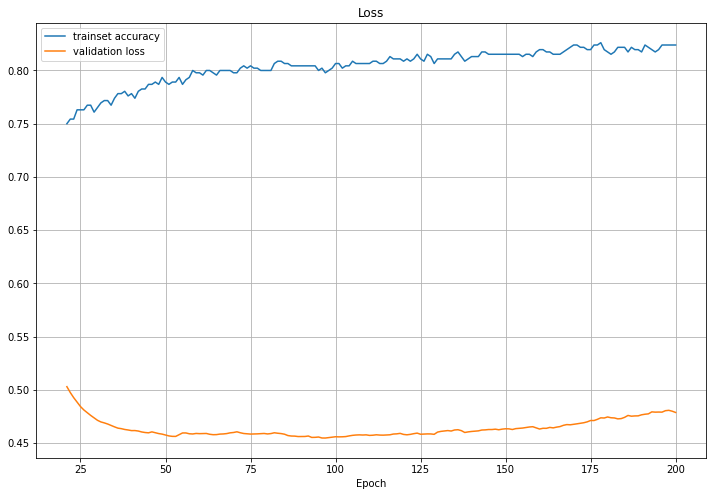

In [41]:
xs = np.arange(21,len(history.history['accuracy'])+1)     # epoch
plt.figure(figsize=(12,8))
plt.plot(xs, history.history['accuracy'][20:], ms=5, label='trainset accuracy')
plt.plot(xs, history.history['val_loss'][20:], ms=10, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.title('Loss')